In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
call_data = pd.read_csv("data/call_data_from_CAD.csv")

In [3]:
call_data.head()

,Unnamed: 0,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,3,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,4,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,5,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [4]:
pattern = r"\b(1J77|3J79|3J78|3J77|4J79|3J81|3J76|2J28|2J29|CAHOOT|CAHOT|CAHO)\b"

def unit_call_sign(call_sign):
    if pd.isna(call_sign):
        return "unknown"
    elif re.fullmatch(pattern, call_sign):
        return "cahoots"
    else:
        return "police"

call_data["call_unit"] = call_data["PrimaryUnitCallSign"].apply(unit_call_sign)
call_data["responding_unit"] = call_data["PrimaryUnitCallSign"].fillna("").apply(
    lambda x: "cahoots" if re.fullmatch(pattern, x) else "police"
)

In [77]:
call_data.head()

,Unnamed: 0,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,...,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition,call_unit,responding_unit,call_city
0,1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,...,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED,police,police,Other
1,2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,...,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED,police,police,Other
2,3,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,...,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED,police,police,Other
3,4,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,...,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED,police,police,Other
4,5,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,...,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED,police,police,Other


In [6]:
call_data = call_data.dropna(subset=["Call_Zipcode"])

In [7]:
#call_data["Call_Zipcode"] = call_data["Call_Zipcode"].astype(int)

In [8]:
def eugene_or_springfield(zipcode):
    if zipcode == 97401 | 97402 | 97403 | 97404 | 97405 | 97408 | 97455 | 97412:
        return "Eugene"
    elif zipcode == 97477 | 97478:
        return "Springfield"
    else:
        return "Other"

In [9]:
call_data["call_city"] = call_data["Call_Zipcode"].apply(eugene_or_springfield)

In [10]:
call_data["Call_Zipcode"]

0          97402.0
1          97402.0
2          97402.0
3          97401.0
4          97401.0
            ...   
1048570    97404.0
1048571    97404.0
1048572    97402.0
1048573    97402.0
1048574    97402.0
Name: Call_Zipcode, Length: 1011473, dtype: float64

In [11]:
call_data["call_city"].unique()

array(['Other'], dtype=object)

In [81]:
income_springfield = pd.read_csv("data/income_data_springfield.csv")
#income_springfield.head()

In [13]:
income_springfield = income_springfield.drop(["ID Year", "ID Race", "Race", "Household Income by Race Moe", "ID Geography"], axis = 1)

In [14]:
income_springfield["Geography"] = "Springfield, OR"

In [15]:
income_eugene = pd.read_csv("data/income_eugene.csv")
#income_eugene.head()

In [16]:
income_eugene = income_eugene.drop(["ID Year", "ID Race", "Race", "Household Income by Race Moe", "ID Geography"], axis = 1)

In [17]:
income_eugene["Geography"] = "Eugene, OR"

In [35]:
income_data = pd.concat([income_springfield, income_eugene], axis=0, join="outer")
income_data.head()

,Year,Household Income by Race,Geography
0,2023,104885,"Springfield, OR"
1,2023,87969,"Springfield, OR"
2,2023,54955,"Springfield, OR"
3,2023,111587,"Springfield, OR"
4,2023,75502,"Springfield, OR"


In [89]:
poverty_springfield = pd.read_csv("data/poverty_and_diversity_springfield.csv")
#poverty_springfield.head()

In [43]:
poverty_springfield = poverty_springfield.drop(["ID Race", "ID Year", "ID Poverty Status", "Poverty Status", "Poverty Population Moe",
                                                "ID Geography", "Slug Geography", "share", "ID Sex"], axis = 1)

In [45]:
poverty_eugene = pd.read_csv("data/poverty_and_diversity_eugene.csv")
#poverty_eugene.head()

In [47]:
poverty_eugene = poverty_eugene.drop(["ID Race", "ID Year", "ID Poverty Status", "Poverty Status", "Poverty Population Moe",
                                      "ID Geography", "Slug Geography", "share", "ID Sex"], axis = 1)

In [49]:
poverty_data = pd.concat([poverty_springfield, poverty_eugene], axis=0, join="outer")
poverty_data.head()

,Race,Year,Poverty Population,Geography,Sex
0,White,2023,3503,"Springfield, OR",Male
1,White,2023,4011,"Springfield, OR",Female
2,Black,2023,61,"Springfield, OR",Male
3,Black,2023,34,"Springfield, OR",Female
4,Native American,2023,19,"Springfield, OR",Male


In [93]:
race_ethnicity_springfield = pd.read_csv("data/race_and_ethnicity_springfield.csv")
#race_ethnicity_springfield.head()

In [55]:
race_ethnicity_springfield = race_ethnicity_springfield.drop(["ID Race", "ID Ethnicity", "ID Year", "Hispanic Population Moe", 
                                                              "ID Geography", "Slug Geography", "share"], axis=1)

In [57]:
race_ethnicity_eugene = pd.read_csv("data/race_and_ethnicity_eugene.csv")
#race_ethnicity_eugene.head()

In [59]:
race_ethnicity_eugene = race_ethnicity_eugene.drop(["ID Race", "ID Ethnicity", "ID Year", "Hispanic Population Moe", 
                                                              "ID Geography", "Slug Geography", "share"], axis=1)

In [61]:
race_ethnicity_data = pd.concat([race_ethnicity_springfield, race_ethnicity_eugene], axis=0, join="outer")
race_ethnicity_data.head()

,Race,Ethnicity,Year,Geography,Population
0,White Alone,Not Hispanic or Latino,2023,"Springfield, OR",46408
1,White Alone,Hispanic or Latino,2023,"Springfield, OR",1917
2,Black or African American Alone,Not Hispanic or Latino,2023,"Springfield, OR",457
3,Black or African American Alone,Hispanic or Latino,2023,"Springfield, OR",42
4,American Indian & Alaska Native Alone,Not Hispanic or Latino,2023,"Springfield, OR",695


In [95]:
uninsured_springfield = pd.read_csv("data/uninsured_people_springfield.csv")
uninsured_springfield.head()

,ID Kaiser Coverage,Kaiser Coverage,ID Year,Year,Health Insurance Policies,Geography,ID Geography,Slug Geography,share
0,0,Medicaid,2023,2023,16986,"Springfield, OR",16000US4169600,springfield-or,27.709173
1,1,Medicare,2023,2023,7083,"Springfield, OR",16000US4169600,springfield-or,11.554461
2,2,Employer,2023,2023,24786,"Springfield, OR",16000US4169600,springfield-or,40.433272
3,3,OtherPublic,2023,2023,997,"Springfield, OR",16000US4169600,springfield-or,1.626401
4,4,NonGroup,2023,2023,6973,"Springfield, OR",16000US4169600,springfield-or,11.375018


In [67]:
uninsured_springfield = uninsured_springfield.drop(["ID Kaiser Coverage", "ID Year", "ID Geography", "Slug Geography", "share"], axis = 1)

In [69]:
uninsured_eugene = pd.read_csv("data/uninsured_people_eugene.csv")
#uninsured_eugene.head()

In [71]:
uninsured_eugene = uninsured_eugene.drop(["ID Kaiser Coverage", "ID Year", "ID Geography", "Slug Geography", "share"], axis = 1)

In [73]:
uninsured_data = pd.concat([uninsured_springfield, uninsured_eugene], axis=0, join="outer")
uninsured_data.head()

,Kaiser Coverage,Year,Health Insurance Policies,Geography
0,Medicaid,2023,16986,"Springfield, OR"
1,Medicare,2023,7083,"Springfield, OR"
2,Employer,2023,24786,"Springfield, OR"
3,OtherPublic,2023,997,"Springfield, OR"
4,NonGroup,2023,6973,"Springfield, OR"


In [233]:
demographic_data = income_data.merge(poverty_data, on = ["Year", "Geography"], how = "outer").merge(
    race_ethnicity_data, on = ["Year", "Geography"], how = "outer").merge(
    uninsured_data, on = ["Year", "Geography"], how = "outer")

In [235]:
demographic_data.head()

,Year,Household Income by Race,Geography,Race_x,Poverty Population,Sex,Race_y,Ethnicity,Population,Kaiser Coverage,Health Insurance Policies
0,2013,42823,"Eugene, OR",White,15292,Male,White Alone,Not Hispanic or Latino,128274,Medicaid,17362
1,2013,42823,"Eugene, OR",White,15292,Male,White Alone,Not Hispanic or Latino,128274,Medicare,14405
2,2013,42823,"Eugene, OR",White,15292,Male,White Alone,Not Hispanic or Latino,128274,Employer,77003
3,2013,42823,"Eugene, OR",White,15292,Male,White Alone,Not Hispanic or Latino,128274,OtherPublic,1721
4,2013,42823,"Eugene, OR",White,15292,Male,White Alone,Not Hispanic or Latino,128274,NonGroup,21575


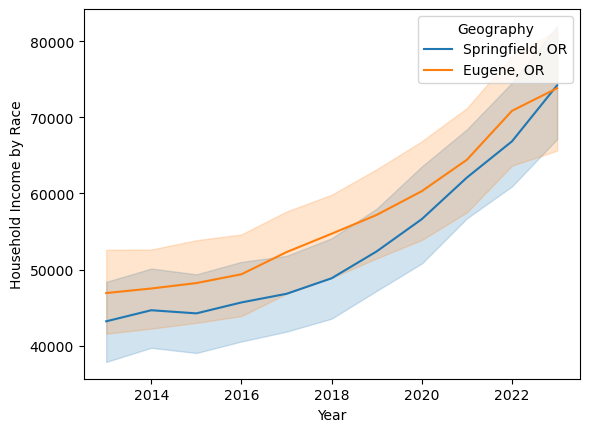

In [273]:
sns.lineplot(income_data, x = "Year", y = "Household Income by Race", hue = "Geography");

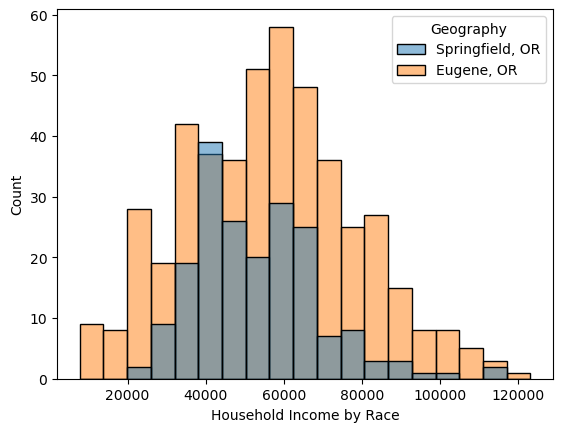

In [275]:
sns.histplot(income_data, x = "Household Income by Race", hue = "Geography");

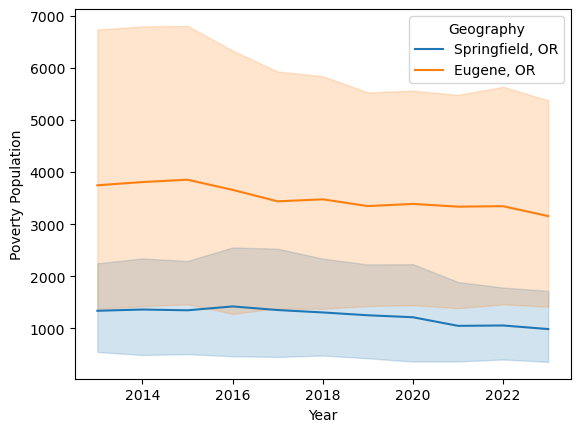

In [277]:
sns.lineplot(poverty_data, x = "Year", y = "Poverty Population", hue = "Geography");

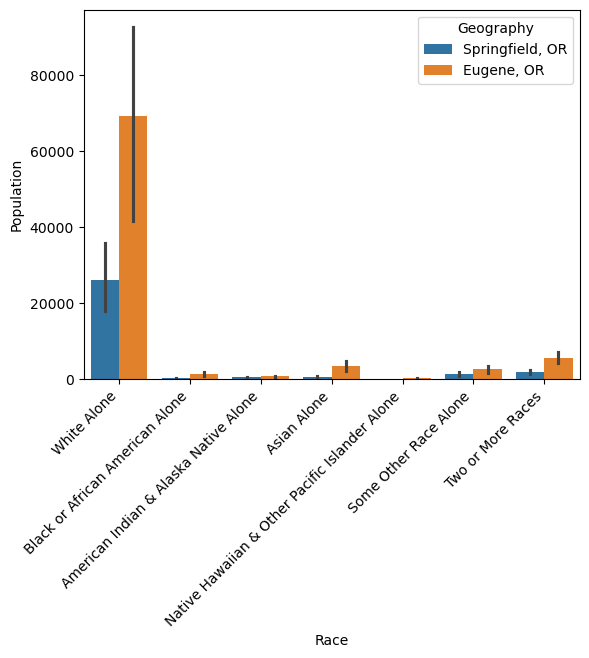

In [279]:
sns.barplot(race_ethnicity_data, x = "Race", y = "Population", hue = "Geography")
plt.xticks(rotation = 45, ha="right");

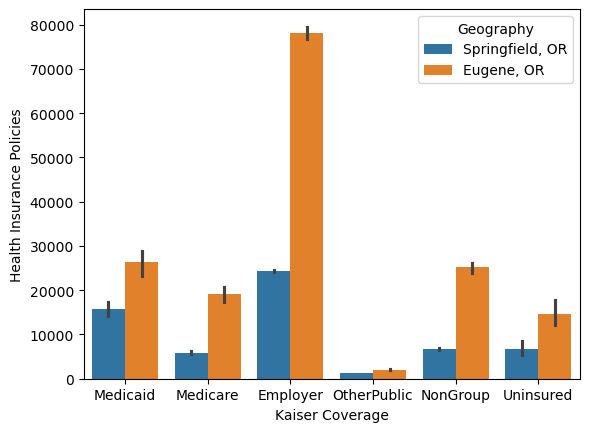

In [283]:
sns.barplot(uninsured_data, x = "Kaiser Coverage", y = "Health Insurance Policies", hue = "Geography");

<Axes: xlabel='Call_Priority'>

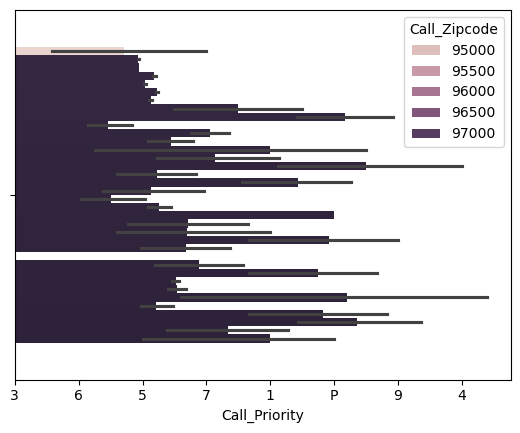

In [351]:
sns.barplot(call_data, x = "Call_Priority", hue = "Call_Zipcode")